In [ ]:
#Instalando bibliotecas que serão utilizadas para análise do trabalho

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [83]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Transferindo os dados que serão trabalhados para o notebook.

In [84]:
import pandas as pd

try:
    xls = pd.ExcelFile("C:\\Users\\brito\\Downloads\\Time-Wasters on Social MediaPT.xlsx")
    df = xls.parse(sheet_name=0, encoding='latin-1')  # Replace 0 with the sheet name if needed
except UnicodeDecodeError:
    xls = pd.ExcelFile("C:\\Users\\brito\\Downloads\\Time-Wasters on Social MediaPT.xlsx")
    df = xls.parse(sheet_name=0, encoding='Windows-1252')

print(df)

     UserID  Idade     Genero     Localização    Renda  Divida  \
0         1     56  Masculino       Paquistão  82812.0    True   
1         2     46   Feminino          México  27999.0   False   
2         3     32   Feminino  Estados Unidos  42436.0   False   
3         4     60  Masculino          Brasil  62963.0    True   
4         5     25  Masculino       Paquistão  22096.0   False   
..      ...    ...        ...             ...      ...     ...   
995     996     22  Masculino           Índia  74254.0    True   
996     997     40   Feminino       Paquistão  27006.0   False   
997     998     27  Masculino           Índia  94218.0    True   
998     999     61  Masculino       Paquistão  85344.0    True   
999    1000     19  Masculino           Índia  53840.0    True   

     Possui propriedade              Profissão Demografia Plataforma  ...  \
0                  True             Engenheiro      Rural  Instagram  ...   
1                  True                Artista     Ur

In [ ]:
# identificando tipo de dados que estaremos trabalhando se estão em texto, numeros inteiros ou booleanos

In [85]:
df.info()  #dtypes: bool(2), int64(16), object(13) = bool 2 colunas verdadeiro ou falso,16 colunas com numeros inteiros e 13 colunas com objetos texto e etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UserID                       1000 non-null   int64  
 1   Idade                        1000 non-null   int64  
 2   Genero                       1000 non-null   object 
 3   Localização                  1000 non-null   object 
 4   Renda                        1000 non-null   float64
 5   Divida                       1000 non-null   bool   
 6   Possui propriedade           1000 non-null   bool   
 7   Profissão                    1000 non-null   object 
 8   Demografia                   1000 non-null   object 
 9   Plataforma                   1000 non-null   object 
 10  Tempo Total Gasto            1000 non-null   int64  
 11  Numero de sessões            1000 non-null   int64  
 12  Video ID                     1000 non-null   int64  
 13  Categoria do Vídeo 

In [ ]:
# Quantidade de colunas e tabelas 

In [7]:
df.shape

(1000, 31)

In [ ]:
 #para identificar se tem valores faltando (NaN)

In [86]:
df.isnull().sum() 

UserID                         0
Idade                          0
Genero                         0
Localização                    0
Renda                          0
Divida                         0
Possui propriedade             0
Profissão                      0
Demografia                     0
Plataforma                     0
Tempo Total Gasto              0
Numero de sessões              0
Video ID                       0
Categoria do Vídeo             0
Duração do Video               0
Engajamento                    0
Pontuação de Importância       0
Tempo gasto no Video           0
Numero de videos Assistidos    0
Taxa de rolagem                0
Frequência                     0
Perda de Produtividade         0
Satisfação                     0
Razão para Assistir            0
Tipo de dispositivo            0
OS Sistema Operacional         0
Tempo assistido                0
Autocontrole                   0
Nivel de Dependência           0
Atividade Atual                0
Tipo de co

In [87]:
df.duplicated().sum() # para identifcar se tem linhas duplicadas ( se sim retornaria 1)

0

In [88]:
df.columns #para identifcar as colunas relacionadas

Index(['UserID', 'Idade', 'Genero', 'Localização', 'Renda', 'Divida',
       'Possui propriedade', 'Profissão', 'Demografia', 'Plataforma',
       'Tempo Total Gasto', 'Numero de sessões', 'Video ID',
       'Categoria do Vídeo', 'Duração do Video', 'Engajamento',
       'Pontuação de Importância', 'Tempo gasto no Video',
       'Numero de videos Assistidos', 'Taxa de rolagem', 'Frequência',
       'Perda de Produtividade', 'Satisfação', 'Razão para Assistir',
       'Tipo de dispositivo', 'OS Sistema Operacional', 'Tempo assistido',
       'Autocontrole', 'Nivel de Dependência', 'Atividade Atual',
       'Tipo de conexão'],
      dtype='object')

In [89]:
df.nunique() #para identificar os valores distintos exemplo existente 47 idades atribuidas entre 1000 pessoas, das 1000 existem 6 generos atribuidos

UserID                         1000
Idade                            47
Genero                            3
Localização                      10
Renda                           996
Divida                            2
Possui propriedade                2
Profissão                         9
Demografia                        2
Plataforma                        4
Tempo Total Gasto               278
Numero de sessões                19
Video ID                        947
Categoria do Vídeo                9
Duração do Video                 29
Engajamento                     953
Pontuação de Importância          9
Tempo gasto no Video             29
Numero de videos Assistidos      49
Taxa de rolagem                  99
Frequência                        4
Perda de Produtividade            9
Satisfação                        9
Razão para Assistir               4
Tipo de dispositivo               3
OS Sistema Operacional            4
Tempo assistido                  16
Autocontrole                

In [ ]:
#para identifcar informações como média, desvio padrão, valores mínimo e máximo, e quartis para cada coluna numérica, o que é útil para entender a distribuição e as características principais dos meus dados.

In [101]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
UserID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Idade,1000.0,40.986,13.497852,18.0,29.00,42.0,52.00,64.0
Renda,1000.0,59480.257,23805.588938,44.0,38615.75,58805.0,79792.25,99676.0
Tempo Total Gasto,1000.0,151.406,83.952637,10.0,78.00,152.0,223.00,298.0
Numero de sessões,1000.0,10.013,5.380314,1.0,6.00,10.0,15.00,19.0
Video ID,1000.0,4891.738,2853.144258,11.0,2542.00,4720.5,7346.00,9997.0
Duração do Video,1000.0,15.214,8.224953,1.0,8.00,15.0,22.00,29.0
Engajamento,1000.0,4997.159,2910.053701,15.0,2415.75,5016.0,7540.25,9982.0
Pontuação de Importância,1000.0,5.129,2.582834,1.0,3.00,5.0,7.00,9.0
Tempo gasto no Video,1000.0,14.973,8.200092,1.0,8.00,15.0,22.00,29.0


In [103]:
df.describe(include='object').T

,count,unique,top,freq
Genero,1000,3,Masculino,514
Localização,1000,10,Índia,228
Profissão,1000,9,Alunos,246
Demografia,1000,2,Rural,746
Plataforma,1000,4,TikTok,273
Categoria do Vídeo,1000,9,Piadas/Memes,179
Frequência,1000,4,Fim de tarde,365
Razão para Assistir,1000,4,Hábito,339
Tipo de dispositivo,1000,3,Smartphone,585
OS Sistema Operacional,1000,4,Android,500


In [105]:
numer=df.select_dtypes(['int64','float32']) #Essa linha de código filtra o DataFrame data, mantendo apenas as colunas que contêm dados numéricos do tipo int64 ou float32. Isso pode ser útil para diversas tarefas, como:

Análise de dados: Facilita a realização de cálculos e análises estatísticas, já que você terá um DataFrame contendo apenas dados numéricos.
Visualização de dados: Permite criar gráficos e visualizações que exigem dados numéricos, como histogramas, gráficos de dispersão, etc.
Pré-processamento de dados: Ajuda a preparar os dados para algoritmos de aprendizado de máquina, que geralmente exigem dados numéricos como entrada.

SyntaxError: invalid syntax (2748572148.py, line 3)

In [29]:
numer

NameError: name 'numer' is not defined

In [107]:
import seaborn as sns

ax = sns.pairplot(numer)

NameError: name 'numer' is not defined

In [ ]:
#Nivel de dependencia das Redes sociais 

O Nível de Vício de 0 a 7 no seu conjunto de dados representa a intensidade do uso de mídias sociais, onde números maiores indicam maior engajamento ou dependência.

Nível 0: Nenhum ou muito pouco uso de mídias sociais.
Nível 1: Uso ou dependência muito baixos.
Nível 2: Uso leve, mas não excessivo.
Nível 3: Uso moderado, parte da rotina diária.
Nível 4: Uso significativo, afetando o gerenciamento do tempo.
Nível 5: Alto uso, impactando outras áreas da vida.
Nível 6: Uso muito alto, possivelmente negligenciando responsabilidades.
Nível 7: Uso extremo, com forte impacto negativo.

Quanto maior o nível, maior o tempo gasto ou a dependência das mídias sociais.

In [109]:
df['Nivel de Dependência'].unique()  #identificar valores dos niveis de dependencia presente no df


array([5, 3, 2, 0, 1, 6, 7, 4], dtype=int64)

In [111]:
counts=df['Nivel de Dependência'].value_counts().to_frame().reset_index()
counts #identificar numero de pessoas de acordo com o nivel de impacto

,Nivel de Dependência,count
0,2,248
1,5,228
2,0,180
3,3,159
4,1,60
5,7,55
6,4,36
7,6,34


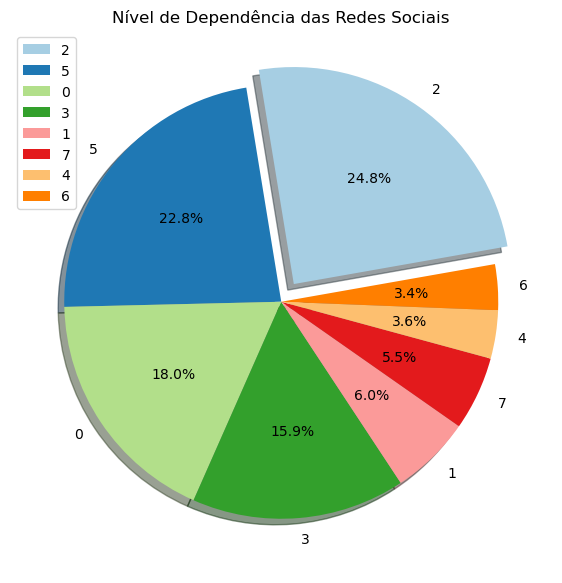

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 8))

# Cria o gráfico de pizza com legendas
plt.pie(counts['count'], labels=counts['Nivel de Dependência'], explode=(0.1, 0, 0, 0, 0, 0, 0, 0), 
        autopct="%1.1f%%", startangle=10, shadow=True, colors=plt.cm.Paired.colors, 
        labeldistance=1.1)  # Aumenta a distância das legendas para acomodar a legenda geral

# Adiciona a legenda geral
plt.legend(counts['Nivel de Dependência'], loc="best")

plt.title('Nível de Dependência das Redes Sociais', color='black')
plt.show()

In [ ]:
#Nível de Vício Mais Comum:

O Nível de Vício 2 é o mais comum, com 248 usuários. Isso sugere que um número significativo de usuários é moderadamente viciado à plataforma.

Baixo Nível de Vício:
O nível de vício 6 tem uma contagem menor de 34 (3,40%), indicando um nível de vício menos frequente no conjunto de dados.

Níveis Altos de Vício são Raros:
Os níveis 5 a 7 têm menos usuários (55, 36 e 34, respectivamente), mostrando que níveis extremamente altos de vício são menos prevalentes

In [ ]:
#ANÁLISE DOS NÍVEIS DE VÍCIO ENTRE AS CATEGORIAS DE IDADE

Categorizando a Idade em Grupos de Jovens, Meia-Idade e Idosos com Base em Intervalos de Idade

In [113]:
Idade=pd.cut(df['Idade'],bins=[df['Idade'].min(),30,50,df['Idade'].max()],labels=['Jovem','Meia-idade','Senhor'])
vicio_por_idade = df.groupby(Idade, observed=False)['Nivel de Dependência'].mean().reset_index()
vicio_por_idade


,Idade,Nivel de Dependência
0,Jovem,2.745968
1,Meia-idade,3.002283
2,Senhor,2.899654


In [229]:
df['Idade'].dtype

dtype('int64')

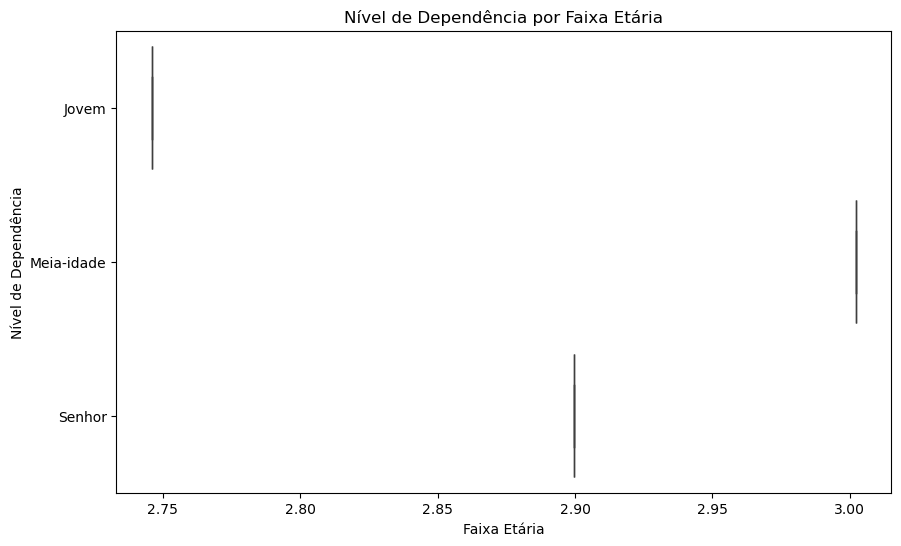

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.bar(figsize=(10, 6)) 
sns.boxplot(data=vicio_por_idade, x='Idade', y='Nivel de Dependência')
plt.title('Nível de Dependência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Nível de Dependência')
plt.show()

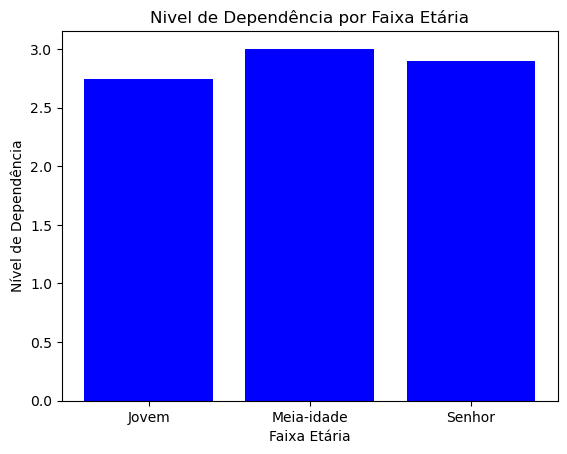

In [241]:
plt.bar(vicio_por_idade['Idade'],vicio_por_idade['Nivel de Dependência'],color='blue')
plt.title('Nivel de Dependência por Faixa Etária',color='black')
plt.xlabel('Faixa Etária')
plt.ylabel('Nível de Dependência')
plt.show()

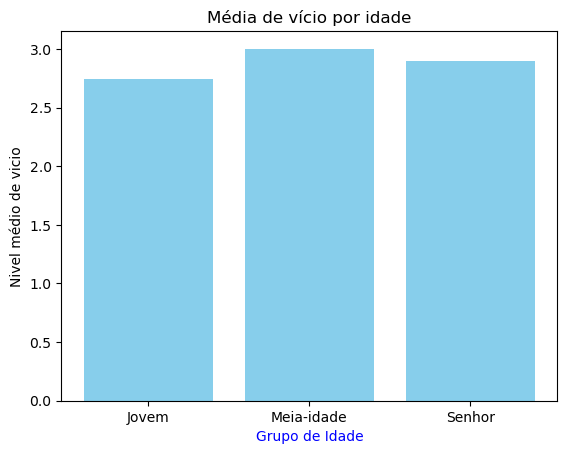

In [117]:
plt.bar(vicio_por_idade['Idade'],vicio_por_idade['Nivel de Dependência'],color='skyblue')
plt.title('Média de vício por idade',color='black')
plt.xlabel('Grupo de Idade', c='blue')
plt.ylabel('Nivel médio de vicio', c='black')
plt.show()

In [ ]:
#ANÁLISE DOS NIVEIS DE VÍCIO POR GENÊRO

In [119]:
vicio_por_genero=df.groupby('Genero')['Nivel de Dependência'].mean().reset_index()
vicio_por_genero

,Genero,Nivel de Dependência
0,Feminino,2.906832
1,Masculino,2.964981
2,Não-binário,2.719512


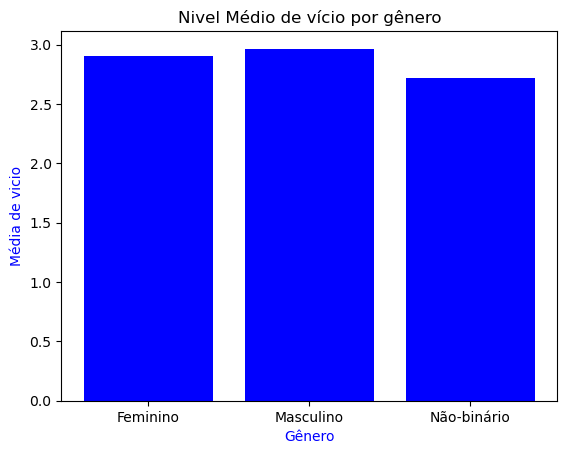

In [49]:
plt.bar(vicio_por_genero['Genero'],vicio_por_genero['Nivel de Dependência'],color='blue')
plt.title('Nivel Médio de vício por gênero',color='black')
plt.xlabel('Gênero', c= 'blue')
plt.ylabel('Média de vicio',c= 'blue')
plt.show()

In [ ]:
# Grupo Masculino Apresenta o Maior Nível de Vício:

O grupo masculino apresenta o maior nível de vício, com um valor de 2,965, indicando que os homens tendem a ter um nível de vício maior em comparação com outros gêneros.

As diferenças nos níveis de vício entre os gêneros são relativamente pequenas, com valores variando de 2,720 a 2,965.

In [121]:
socialmedia_by_profession=df['Profissão'].value_counts().reset_index()
socialmedia_by_profession

,Profissão,count
0,Alunos,246
1,Equipe de atendimento,194
2,Operário,186
3,Motorista,113
4,Engenheiro,65
5,Caixa,56
6,Gerente,54
7,Artista,47
8,Professor,39


In [ ]:
#USAGE OF SOCIAL MEDIA BY PROFESSION (ANALYSIS OF PROFESSION DISTRIBUTION)

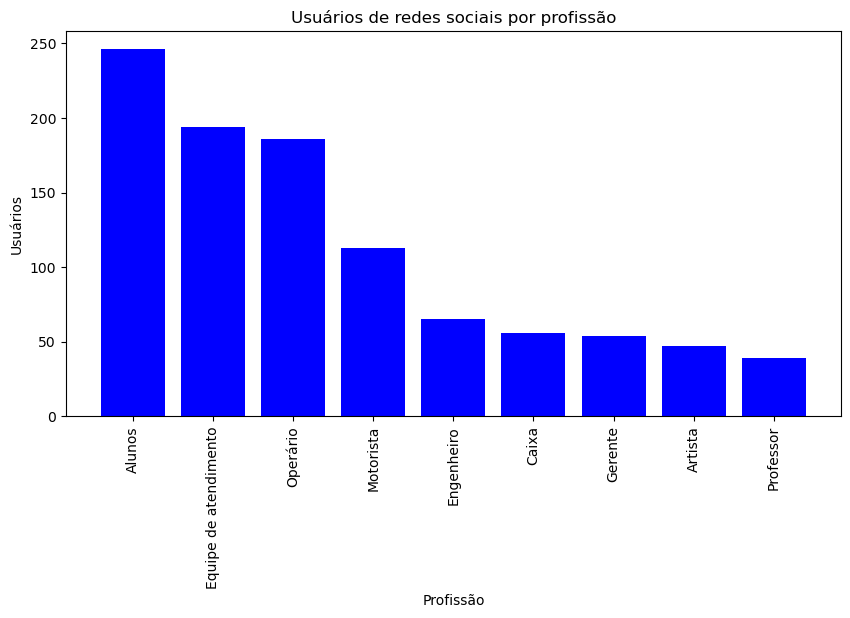

In [51]:
plt.figure(figsize=(10,5))
plt.bar(socialmedia_by_profession['Profissão'],socialmedia_by_profession['count'],color='b')
plt.title('Usuários de redes sociais por profissão',color='black')
plt.xlabel('Profissão')
plt.ylabel('Usuários')
plt.xticks(rotation=90)
plt.show()

In [ ]:
The dataset is largely dominated by students and service industry roles (waiting staff, labor/workers)
while skilled professions such as engineers, managers, and teachers have smaller representations.
Creative professions (artists) are also present but in lower numbers.

In [ ]:
ANALYSIS OF TOTAL TIME SPEND ON SOCIAL MEDIA PLATFORMS

In [55]:
most_used_platform=df.groupby('Plataforma')['Tempo Total Gasto'].sum().reset_index()
most_used_platform

,Plataforma,Tempo Total Gasto
0,Facebook,34295
1,Instagram,37609
2,TikTok,41297
3,YouTube,38205


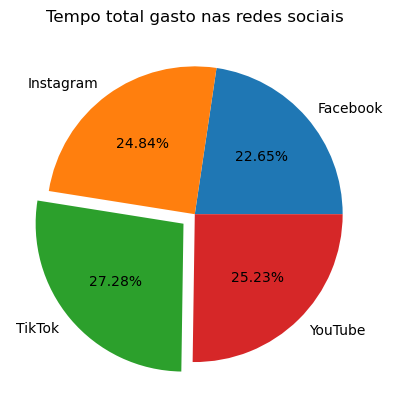

In [59]:
plt.pie(most_used_platform['Tempo Total Gasto'],labels=most_used_platform['Plataforma'],explode=(0,0,0.1,0),autopct='%1.2f%%')
plt.title('Tempo total gasto nas redes sociais',color='black')
plt.show()

In [ ]:
It looks like TikTok is the most popular platform, followed closely by YouTube and Instagram.
Facebook is slightly behind but still has a significant share.

In [ ]:
WATCHING TIME OF SOCIAL MEDIA

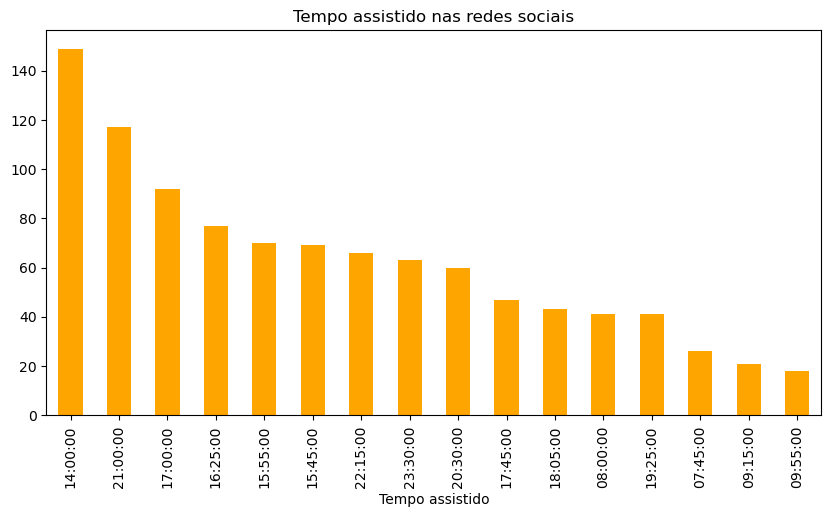

In [52]:
watch_time=df['Tempo assistido'].value_counts().plot(kind='bar',figsize=(10,5),title='Tempo assistido nas redes sociais',color='orange');

In [ ]:
Os dados mostram que a tarde (14h às 17h) e a noite (20h às 23h30) são os períodos de maior atividade para visualizações.

As manhãs e o início da tarde têm engajamento relativamente baixo.


In [ ]:
MOST USED PLATFORM BY AGE GROUP

In [54]:
df['Faixa etária']=pd.cut(df['Idade'],bins=[df['Idade'].min(),30,50,df['Idade'].max()],labels=['Jovem','Meia-idade','Senhor'])

In [116]:
plataforma_usada_por_idade = df.groupby(['Faixa etária', 'Plataforma'],observed=False)['Tempo Total Gasto'].sum().reset_index()
plataforma_usada_por_idade 

,Faixa etária,Plataforma,Tempo Total Gasto
0,Jovem,Facebook,8827
1,Jovem,Instagram,8884
2,Jovem,TikTok,11145
3,Jovem,YouTube,10430
4,Meia-idade,Facebook,15471
5,Meia-idade,Instagram,17276
6,Meia-idade,TikTok,16706
7,Meia-idade,YouTube,14782
8,Senhor,Facebook,9464
9,Senhor,Instagram,10875


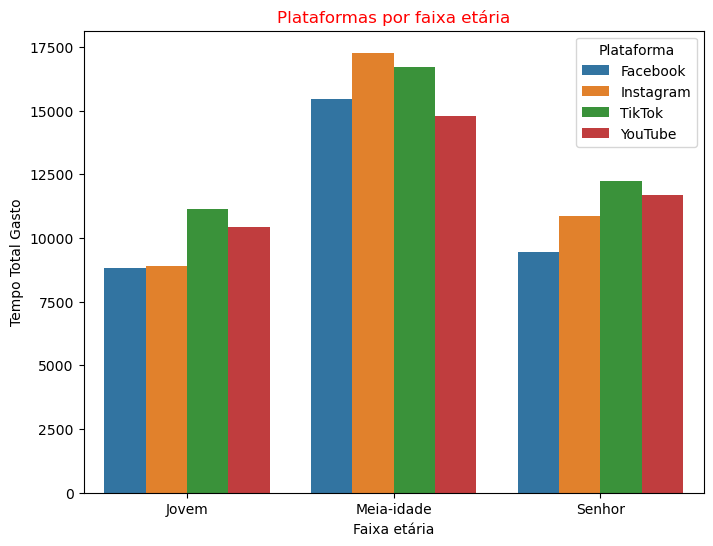

In [108]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Faixa etária', y='Tempo Total Gasto', hue='Plataforma', data= plataforma_usada_por_idade)  # Corrigido aqui
plt.title('Plataformas por faixa etária', color='red')
plt.show()

In [120]:
most_used_platform_by_age = plataforma_usada_por_idade.loc[plataforma_usada_por_idade.groupby('Faixa etária',observed=False)['Tempo Total Gasto'].idxmax()].reset_index(drop=True)
most_used_platform_by_age

,Faixa etária,Plataforma,Tempo Total Gasto
0,Jovem,TikTok,11145
1,Meia-idade,Instagram,17276
2,Senhor,TikTok,12231


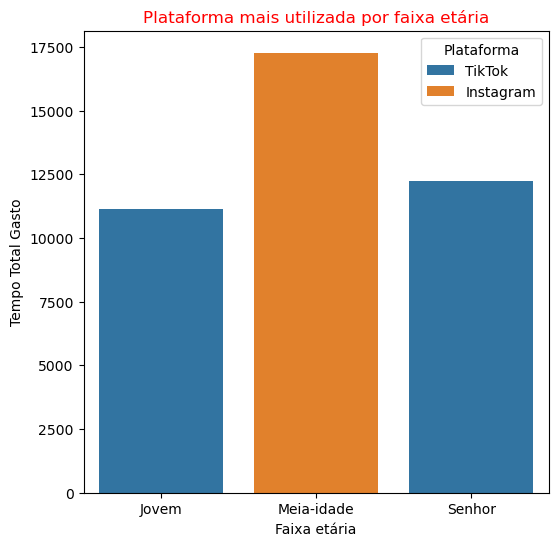

In [62]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Faixa etária',y='Tempo Total Gasto',hue='Plataforma',data=most_used_platform_by_age)
plt.title('Plataforma mais utilizada por faixa etária',color='red')
plt.show()

In [ ]:
Usuários Jovens: Eles passam a maior parte do tempo no TikTok (11.145 unidades de tempo).

Usuários de Meia-Idade: Eles também passam a maior parte do tempo no Instagram (17.276).

Usuários Mais Velhos:  Pessoas mais velhas passam a maior parte do tempo no TikTok (12.231).

Uso Geral das Plataformas:

O TikTok é o favorito em todas as faixas etárias.
O Instagram é particularmente popular entre usuários de meia-idade.
O Facebook tem o menor uso entre todos os grupos.
O YouTube é usado de forma consistente, mas não é a primeira escolha.

In [ ]:
Categorias mais populares de videos

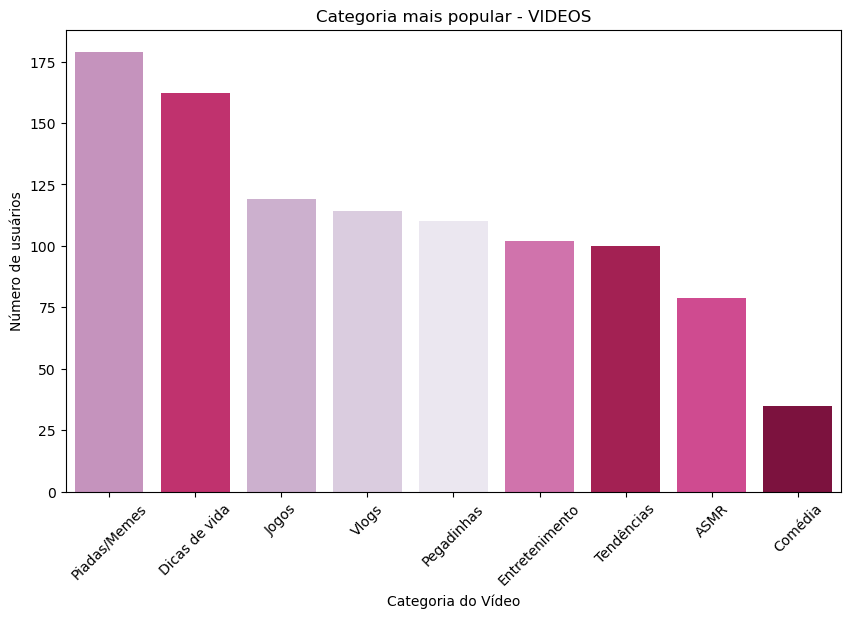

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Categoria do Vídeo', hue= 'Categoria do Vídeo', data=df, color='grey', palette='PuRd', order=df['Categoria do Vídeo'].value_counts().index)
plt.title('Categoria mais popular - VIDEOS')
plt.xticks(rotation=45)

plt.ylabel('Número de usuários')  

plt.show()

In [ ]:
"Piadas/Memes" é a categoria de vídeo mais popular.

"Dicas e Truques" também é muito popular.

"Comédia" tem a menor contagem.

In [ ]:
Tipos de dispostivos

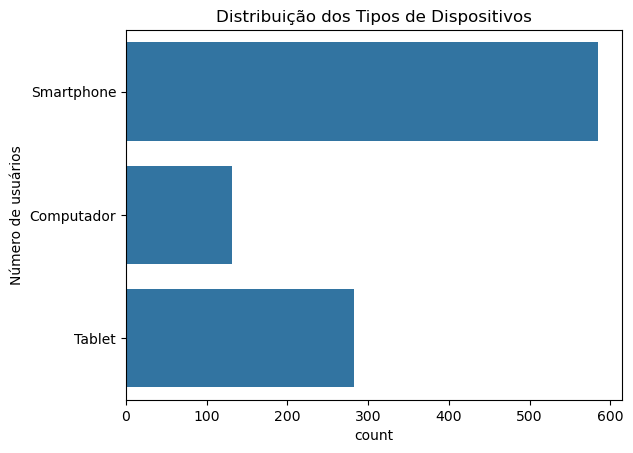

In [66]:
sns.countplot(y='Tipo de dispositivo', data=df)
plt.title('Distribuição dos Tipos de Dispositivos')
plt.ylabel('Número de usuários') 
plt.show()

In [ ]:
Usuários de Smartphones: A maioria dos usuários (58,5%) utiliza smartphones.

In [ ]:
Análise do Nível de Vício e Tempo Gasto por Frequência de Uso 

In [90]:
media_vicio_tempo_por_frequencia = df.groupby('Frequência')[['Nivel de Dependência','Tempo Total Gasto']].mean().reset_index()
media_vicio_tempo_por_frequencia


,Frequência,Nivel de Dependência,Tempo Total Gasto
0,Fim de tarde,2.126027,155.498630
1,Manhã,0.716981,147.603774
2,Noite,4.754902,152.297386
3,Tarde,2.686099,145.291480


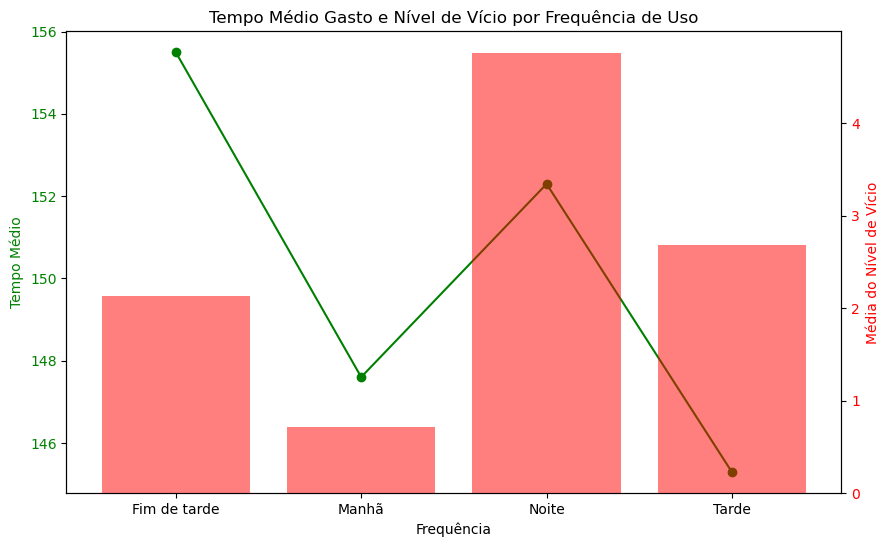

In [190]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de linha
ax1.plot(media_vicio_tempo_por_frequencia['Frequência'], media_vicio_tempo_por_frequencia['Tempo Total Gasto'], color='green', marker='o')
ax1.set_xlabel('Frequência')
ax1.set_ylabel('Tempo Médio', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Cria um segundo eixo y
ax2 = ax1.twinx()

# Gráfico de barras
ax2.bar(media_vicio_tempo_por_frequencia['Frequência'], media_vicio_tempo_por_frequencia['Nivel de Dependência'], color='red', alpha=0.5)  # alpha para transparência
ax2.set_ylabel('Média do Nível de Vício', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Tempo Médio Gasto e Nível de Vício por Frequência de Uso')
plt.show()

In [ ]:
Tempo Médio Gasto por Frequência de Uso:

Fim de Tarde: As pessoas passam mais tempo nas redes sociais.
Tarde: As pessoas passam menos tempo nas redes sociais.

Nível Médio de Vício por Frequência de Uso:

Noite: Maior nível de vício.
Manhã: Menor nível de vício.
Em termos simples, as pessoas tendem a usar mais as redes sociais à noite, mas se sentem mais viciadas durante a madrugada.

In [ ]:
  ANÁLISE DO NÍVEL DE VÍCIO POR LOCAL

In [216]:
counts=df['Localização'].value_counts().to_frame().reset_index()
counts

,Localização,count
0,Índia,228
1,Estados Unidos,174
2,Vietnã,82
3,Filipinas,78
4,Brasil,77
5,Indonésia,77
6,Paquistão,76
7,Japão,75
8,México,73
9,Alemanha,59


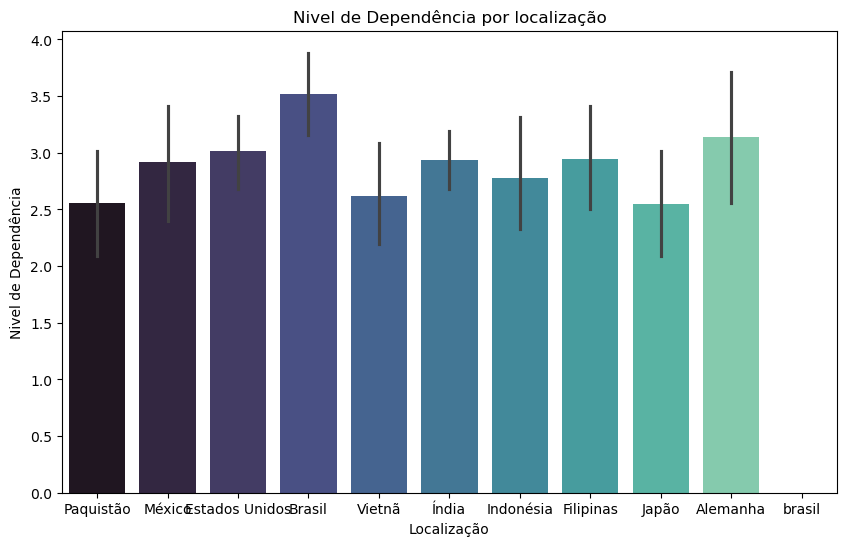

In [204]:
plt.figure(figsize = (10,6)) #hue = para REMOVER AVISOS"
sns.barplot(x = 'Localização',y = 'Nivel de Dependência', hue='Localização',data = df,palette="mako")
plt.title('Nivel de Dependência por localização')
plt.show()

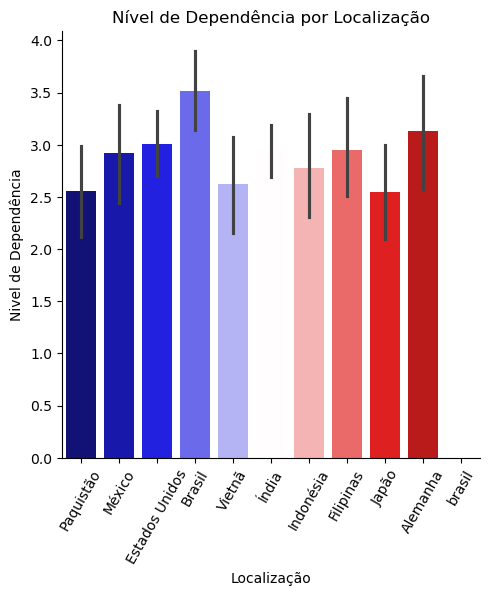

In [222]:
sns.catplot(x='Localização', y='Nivel de Dependência',hue='Localização', kind="bar", data=df, palette="seismic")
plt.title('Nível de Dependência por Localização')
plt.xticks(rotation=60)
plt.show()

In [ ]:
Brasil e Alemanha apresentam níveis de vício relativamente mais altos em comparação com outros países.

Países asiáticos como Paquistão, Vietnã e Japão tendem a ter níveis de vício mais baixos em média.

In [ ]:
ANALISANDO O NÚMERO TOTAL DE VÍDEOS ASSISTIDOS POR LOCALIZAÇÃO 

In [224]:
location_data=df.groupby("Localização")["Numero de videos Assistidos"].sum().reset_index()
location_data

,Localização,Numero de videos Assistidos
0,Alemanha,1441
1,Brasil,2083
2,Estados Unidos,4554
3,Filipinas,1893
4,Indonésia,2147
5,Japão,1987
6,México,1682
7,Paquistão,2009
8,Vietnã,1736
9,brasil,46


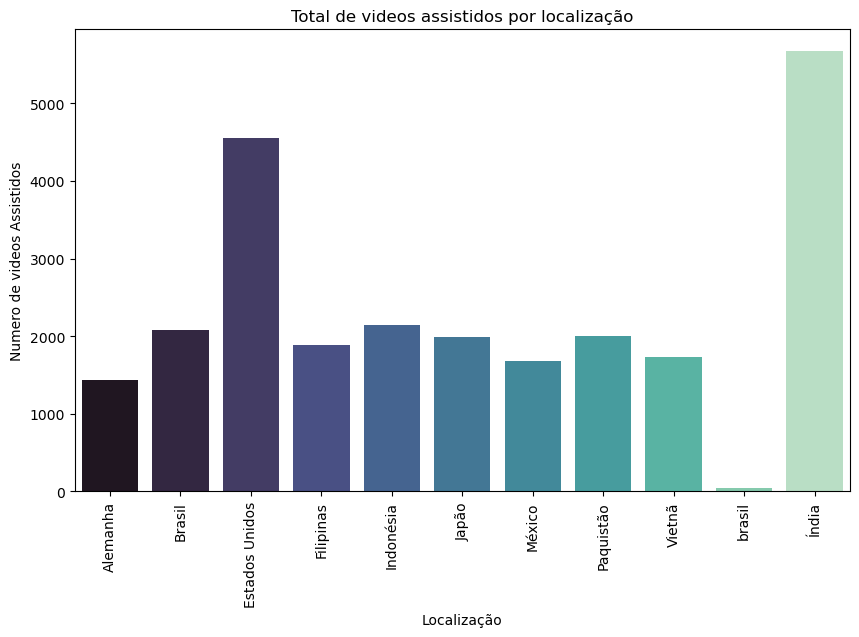

In [230]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Localização',y = 'Numero de videos Assistidos', hue='Localização',data =location_data ,palette="mako")
plt.title('Total de videos assistidos por localização')
plt.xticks(rotation=90)
plt.show()

In [ ]:
India tem o número de videos assistidos alto

In [ ]:
Alemanha tem o número de videos assistidos baixo

In [ ]:
ANALISE DE PERCA DA PRODUTIVIDADE POR FAIXA ETÁRIA

C:\Users\brito\AppData\Local\Temp\ipykernel_8172\673032333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Faixa etária', y='Perda de Produtividade', palette='Set3')


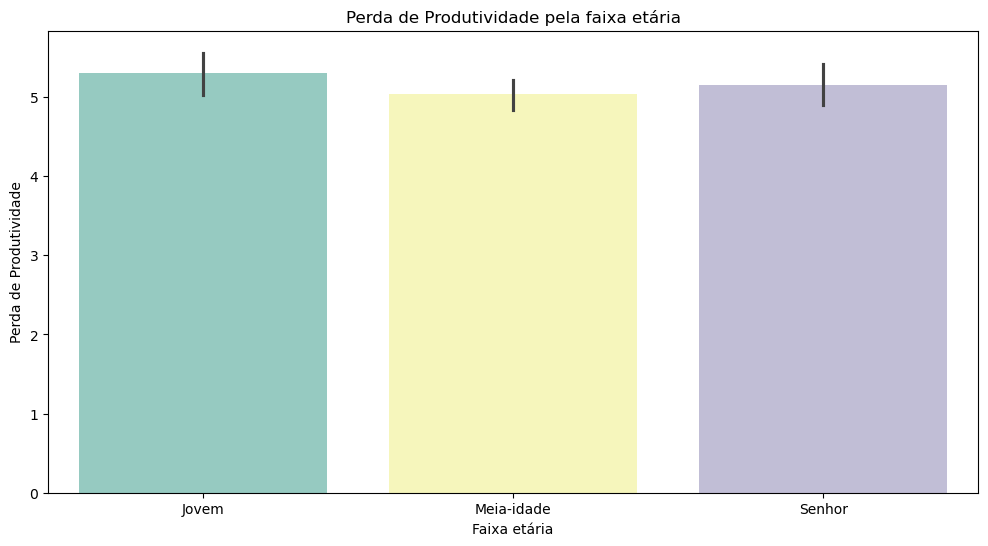

In [240]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Faixa etária', y='Perda de Produtividade', palette='Set3')
plt.title('Perda de Produtividade pela faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Perda de Produtividade')
plt.show()

In [ ]:
ANALISE DE PERDA DA PRODUTIVIDADE POR GÊNERO

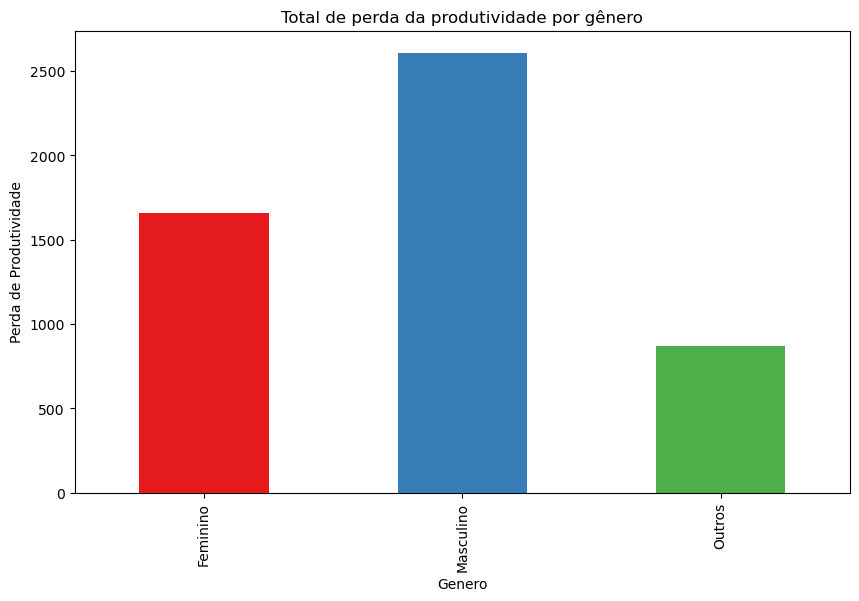

In [253]:
df.groupby('Genero')['Perda de Produtividade'].sum().plot(kind='bar', figsize=(10, 6), color=plt.cm.Set1.colors)
plt.title('Total de perda da produtividade por gênero')
plt.ylabel('Perda de Produtividade')
plt.show()


In [ ]:
#Maior Perda de Produtividade: A categoria "Masculino" apresenta a maior perda total de produtividade, chegando a quase 2500 unidades.

#Perda de Produtividade Moderada: A categoria "Feminino" tem uma perda de produtividade moderada, com a barra indicando um valor entre 1500 e 2000 unidades.

#Menor Perda de Produtividade: A categoria "Outro" tem a menor perda de produtividade.

In [ ]:
ANÁLISE DOS FATORES QUE AFETAM A PERDA DE PRODUTIVIDADE

In [ ]:
#Matriz de Correlação: O mapa de calor revela as relações entre diferentes características. Correlações fortes podem ajudar a identificar os principais fatores que influenciam a perda de produtividade.

In [75]:
correlation_matrix = df[['Perda de Produtividade', 'Nivel de Dependência', 'Engajamento', 'Renda', 'Autocontrole','Tempo Total Gasto','Duração do Video','Satisfação']].corr()
correlation_matrix

,Perda de Produtividade,Nivel de Dependência,Engajamento,Renda,Autocontrole,Tempo Total Gasto,Duração do Video,Satisfação
Perda de Produtividade,1.000000,-0.994939,-0.025050,0.042412,0.994939,-0.014210,-0.004364,-1.000000
Nivel de Dependência,-0.994939,1.000000,0.027620,-0.040947,-1.000000,0.016086,0.004914,0.994939
Engajamento,-0.025050,0.027620,1.000000,-0.017292,-0.027620,-0.033743,0.001286,0.025050
Renda,0.042412,-0.040947,-0.017292,1.000000,0.040947,0.016378,0.016531,-0.042412
Autocontrole,0.994939,-1.000000,-0.027620,0.040947,1.000000,-0.016086,-0.004914,-0.994939
Tempo Total Gasto,-0.014210,0.016086,-0.033743,0.016378,-0.016086,1.000000,0.068607,0.014210
Duração do Video,-0.004364,0.004914,0.001286,0.016531,-0.004914,0.068607,1.000000,0.004364
Satisfação,-1.000000,0.994939,0.025050,-0.042412,-0.994939,0.014210,0.004364,1.000000


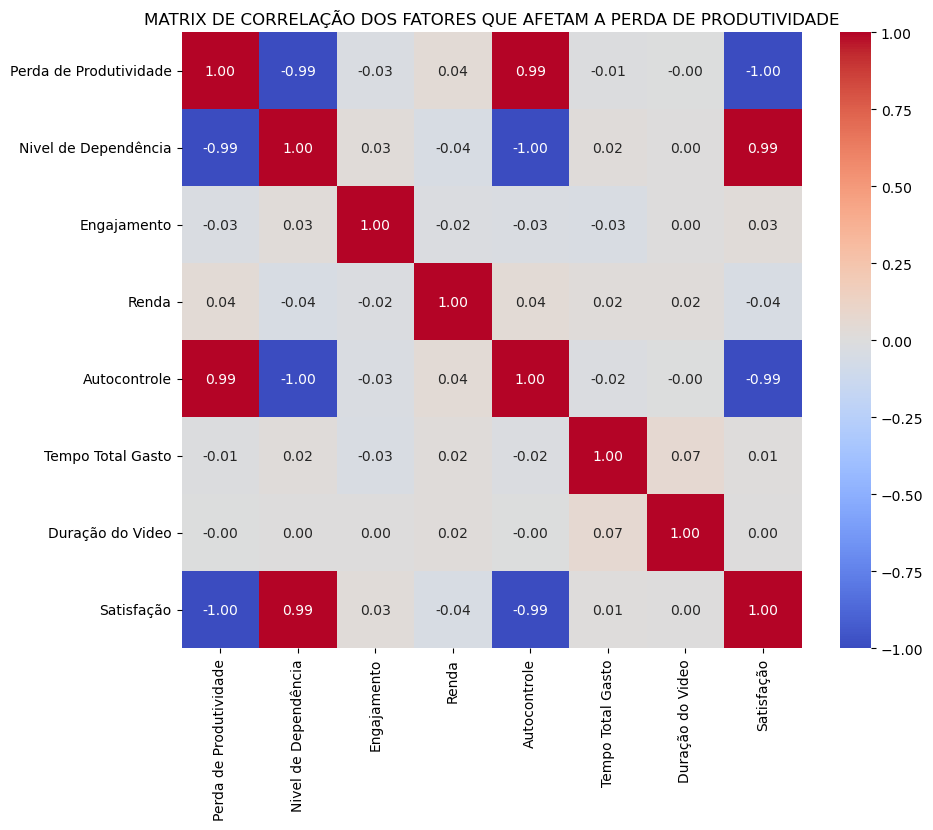

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MATRIX DE CORRELAÇÃO DOS FATORES QUE AFETAM A PERDA DE PRODUTIVIDADE')
plt.show()

In [ ]:
#Nível de Vício: Forte correlação positiva com a perda de produtividade. Níveis mais altos de vício levam a uma maior perda de produtividade.

Renda: Fraca correlação positiva. Leve aumento na perda de produtividade com maior renda.

Tempo Total Gasto: Correlação moderadamente positiva. Mais tempo gasto em tarefas está ligado a uma maior perda de produtividade.

Engajamento: Correlação moderadamente negativa. Maior engajamento reduz a perda de produtividade.

Autocontrole: Correlação muito forte e negativa. Maior autocontrole reduz significativamente a perda de produtividade.

Satisfação: Há uma forte correlação negativa entre satisfação e perda de produtividade. Isso significa que níveis mais altos de satisfação estão associados a uma menor perda de produtividade.

In [ ]:
SUGESTÕES PARA REDUZIR O IMPACTO DAS MÍDIAS SOCIAIS NA PRODUTIVIDADE

In [ ]:
Defina Limites de Tempo: Use aplicativos ou cronômetros para limitar o tempo que você passa nas mídias sociais.

Desative as Notificações: Desative os alertas das mídias sociais para evitar distrações.

Crie Espaços Livres de Mídias Sociais: Mantenha as mídias sociais fora do seu espaço de trabalho.

Use Modos de Foco: Ative o "Modo Foco" no seu telefone para bloquear distrações.

Limite o Acesso: Remova os aplicativos de mídia social do seu telefone ou use-os apenas em um dispositivo.

Agende Pausas: Defina horários específicos para verificar as mídias sociais, como durante o almoço ou depois do trabalho.

Faça Outras Atividades: Substitua o tempo que você passa rolando o feed por atividades como caminhar, ler ou praticar hobbies.

Seja Consciente: Pense no motivo pelo qual você está usando as mídias sociais e monitore seu uso.

Separe o Uso Profissional do Pessoal: Use as mídias sociais apenas para tarefas relacionadas ao trabalho durante o expediente.

Faça Pausas das Mídias Sociais: Experimente desintoxicações digitais evitando as mídias sociais por determinados períodos, como fins de semana.

Isso pode te ajudar a se manter focado e produtivo.

In [123]:

counts=df['Demografia'].value_counts().to_frame().reset_index()
counts

,Demografia,count
0,Rural,746
1,Urbano,254


In [168]:
colunas_selecionadas = ['Idade', 'Nivel de Dependência', 'Autocontrole']

| sepal length (cm)   | sepal width (cm)   | petal length (cm)   | petal width (cm)   | species   |
|:--------------------|:-------------------|:--------------------|:-------------------|:----------|
| 5.1                 | 3.5                | 1.4                 | 0.2                | setosa    |
| 4.9                 | 3                  | 1.4                 | 0.2                | setosa    |
| 4.7                 | 3.2                | 1.3                 | 0.2                | setosa    |
| 4.6                 | 3.1                | 1.5                 | 0.2                | setosa    |
| 5                   | 3.6                | 1.4                 | 0.2                | setosa    |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2  

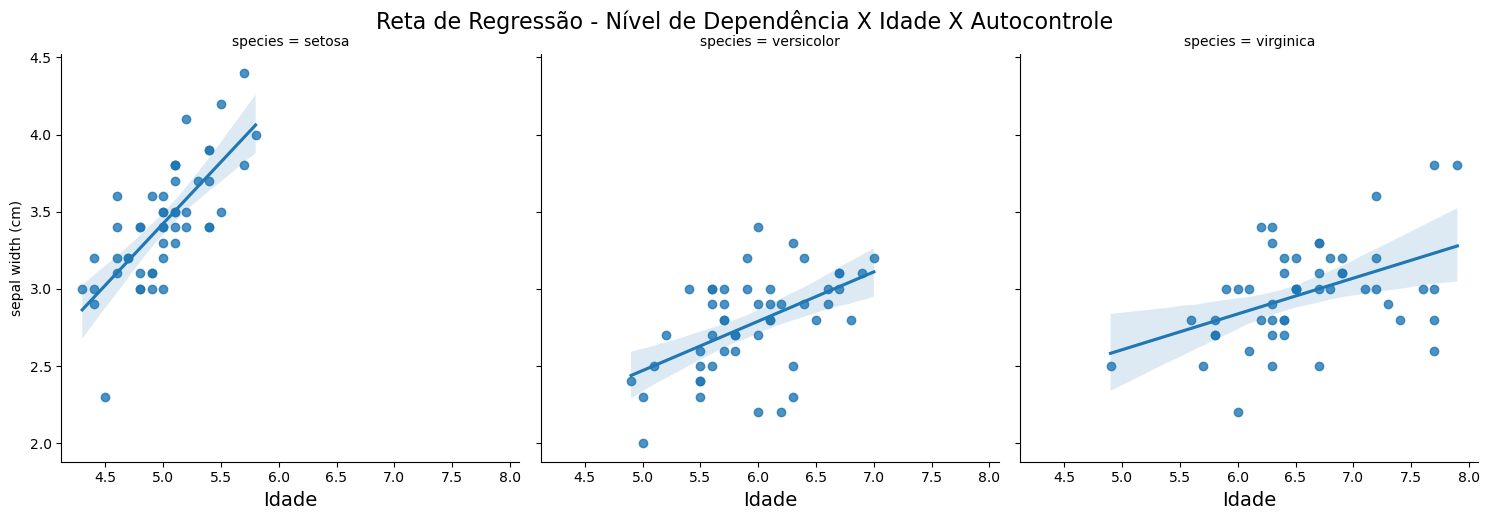

In [158]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carregar o conjunto de dados Iris
iris = load_iris()

# Converter para DataFrame do Pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Exibir as primeiras 5 linhas do DataFrame
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Exibir as colunas do DataFrame
print(df.info())

# Corrigindo o código com os nomes corretos das colunas
ax = sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=df, col="species")
ax.fig.suptitle('Reta de Regressão - Nível de Dependência X Idade X Autocontrole', fontsize=16, y=1.02)
ax.set_xlabels("Idade", fontsize=14)

# Mostrar o gráfico
plt.show()

In [120]:
ax = sns.lmplot(x="Idade", y="Nivel de Dependência", dados=dados, col="Satisfação")
ax.fig.suptitle('Reta de Regressão - Nivel de Dependência X Idade X Satisfação', fontsize=16, y=1.02)
ax.set_xlabels("Idade", fontsize=14)
ax.set_ylabels("Nivel de Dependência", fontsize=14)
ax

NameError: name 'dados' is not defined

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select features and target
X = df[['Idade', 'Renda', 'Perda de Produtividade', 'Satisfação', 'Autocontrole']]  # Add more relevant features
y = df['Nivel de Dependência']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.005125333333333333


In [127]:
from sklearn.model_selection import train_test_split

In [297]:
y = df['Nivel de Dependência']

In [299]:
X = df[['Tempo Total Gasto','Engajamento','Duração do Video', 'Renda', 'Perda de Produtividade', 'Satisfação', 'Autocontrole']]

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
X_train.shape

(700, 7)

In [175]:
X_test.shape

(300, 7)

In [179]:
X_train.shape[0] + X_test.shape[0]

1000

In [181]:
X.shape[0] * 0.3

300.0

In [183]:
X.shape[0] * 0.7

700.0

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [303]:
modelo = LinearRegression()

In [281]:
modelo.fit(X_train, y_train)

LinearRegression()

In [311]:
modelo.fit(X,y)

LinearRegression()

In [313]:
print('R² = {}'.format(modelo.score(X,y).round(2)))

R² = 1.0


In [193]:
y_previsto = modelo.predict(X_test)

In [287]:
print(X.shape)

(1000, 7)


In [289]:
print(y.shape)

(1000,)


In [315]:
print('R² = %s' % metrics.r2_score(X,y).round(2))

ValueError: y_true and y_pred have different number of output (7!=1)

In [197]:
entrada = X_test[0:1]
entrada

,Tempo Total Gasto,Engajamento,Duração do Video,Renda,Perda de Produtividade,Satisfação,Autocontrole
521,78,5977,23,92982.0,7,3,9


In [199]:
modelo.predict(entrada)[0]

0.9999999999999982

In [201]:
modelo.intercept_

10.00000000000004

In [203]:
type(modelo.intercept_)

numpy.float64

In [205]:
modelo.coef_

array([ 9.98331745e-19,  5.42101086e-19, -7.47234996e-17, -8.13151629e-20,
       -3.36162549e-15, -3.74380187e-15, -1.00000000e+00])

In [207]:
type(modelo.coef_)

numpy.ndarray

In [209]:
X.columns

Index(['Tempo Total Gasto', 'Engajamento', 'Duração do Video', 'Renda',
       'Perda de Produtividade', 'Satisfação', 'Autocontrole'],
      dtype='object')

In [217]:
index=['Intercepto','Tempo Total Gasto','Engajamento','Duração do Video', 'Renda', 'Perda de Produtividade', 'Satisfação', 'Autocontrole']

In [213]:
import numpy as np

In [219]:
import numpy as np
import pandas as pd

# ... seu código anterior ...

pd.DataFrame(np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,1.000000e+01
Tempo Total Gasto,9.983317e-19
Engajamento,5.421011e-19
Duração do Video,-7.472350e-17
Renda,-8.131516e-20
Perda de Produtividade,-3.361625e-15
Satisfação,-3.743802e-15
Autocontrole,-1.000000e+00


In [ ]:
#conclui-se que a Variavel que possui mais influência sob a váriavel dependente (nivel de dependência) é a de autocontrole. Se autocontrole aumenta a nivel de dependência diminui

In [ ]:
#O resultado que você obteve mostra os parâmetros do seu modelo de regressão linear, organizados em um DataFrame do Pandas. Vamos entender cada parte:

#Parâmetros:

#Essa coluna lista os nomes dos parâmetros do seu modelo. No caso da regressão linear, os parâmetros são:

#Intercepto: O valor em que a linha de regressão cruza o eixo y quando todas as variáveis independentes são zero.
#Idade , Renda, Perda de Produtividade, Satisfação, Autocontrole: Os coeficientes de cada variável independente no modelo. Esses coeficientes indicam a influência de cada variável na variável dependente.
#Valores:

##Os valores na coluna "Parâmetros" representam os valores estimados para cada parâmetro do seu modelo.

#Intercepto: 1.000000e+01 significa 10.
#Idade: -4.800843e-19 é um valor muito pequeno, próximo de zero. Isso sugere que a idade tem pouca ou nenhuma influência na variável dependente.
#Renda: -3.924812e-17 também é um valor muito próximo de zero, indicando que a renda pode não ter um impacto significativo na variável dependente.
#Perda de Produtividade: 1.092295e-15, Satisfação: 1.711018e-15 são valores muito pequenos, próximos de zero.
#Autocontrole: -1.000000e+00 significa -1. Esse valor indica que o autocontrole tem uma influência negativa na variável dependente. À medida que o autocontrole aumenta, a variável dependente tende a diminuir.
#Interpretação:

#Esses resultados sugerem que, no seu modelo, o autocontrole é a variável que mais influencia a variável dependente. As outras variáveis (Idade, Renda, Perda de Produtividade e Satisfação) parecem ter pouca influência,  considerando os valores próximos de zero dos seus coeficientes.

#Observações:

#A interpretação dos coeficientes depende da escala das variáveis. Se as variáveis tiverem escalas muito diferentes, pode ser necessário padronizá-las antes de interpretar os coeficientes.
#É importante analisar outras métricas de avaliação do modelo, como o R-quadrado e o erro quadrático médio, para ter uma visão completa da performance do modelo.
####Se você puder fornecer mais contexto sobre o modelo e os dados (variável dependente, objetivo da análise), posso te ajudar a interpretar melhor esses resultados.

In [88]:
y_previsto_train = modelo.predict(X_train)

In [92]:
import seaborn as sns

<Axes: title={'center': 'Previsão X Real'}, xlabel='Nivel de Dependência - Previsão', ylabel='Nivel de Dependência - Real'>

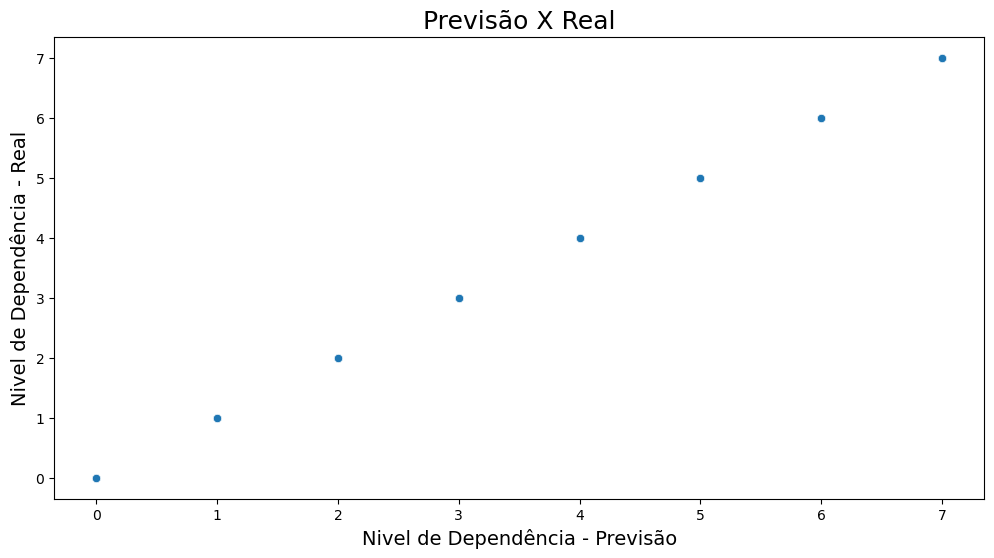

In [102]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Nivel de Dependência - Previsão', fontsize=14)
ax.set_ylabel('Nivel de Dependência - Real', fontsize=14)
ax

In [100]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Nivel de Dependência - Previsão', ylabel='Resíduos'>

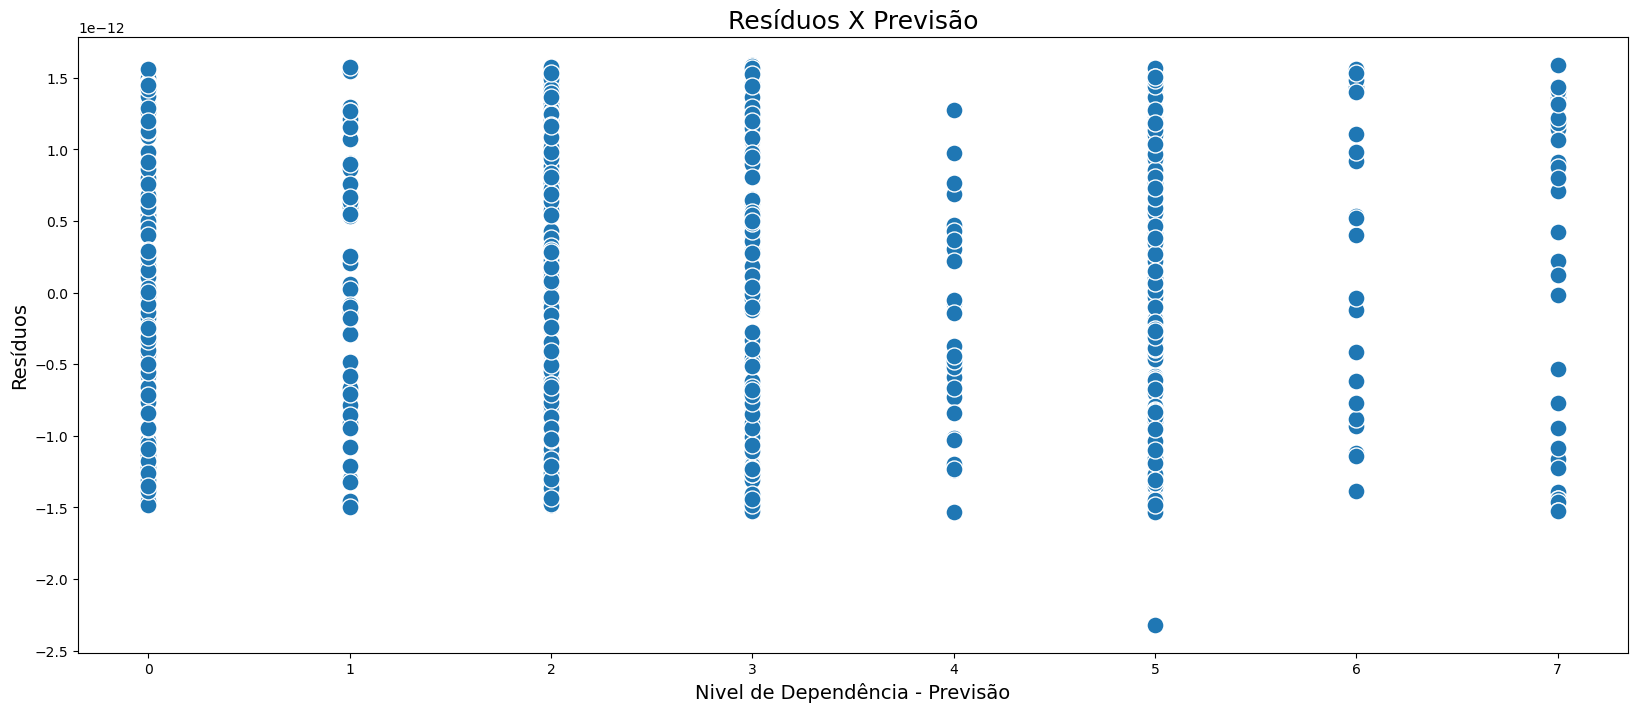

In [104]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Nivel de Dependência - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

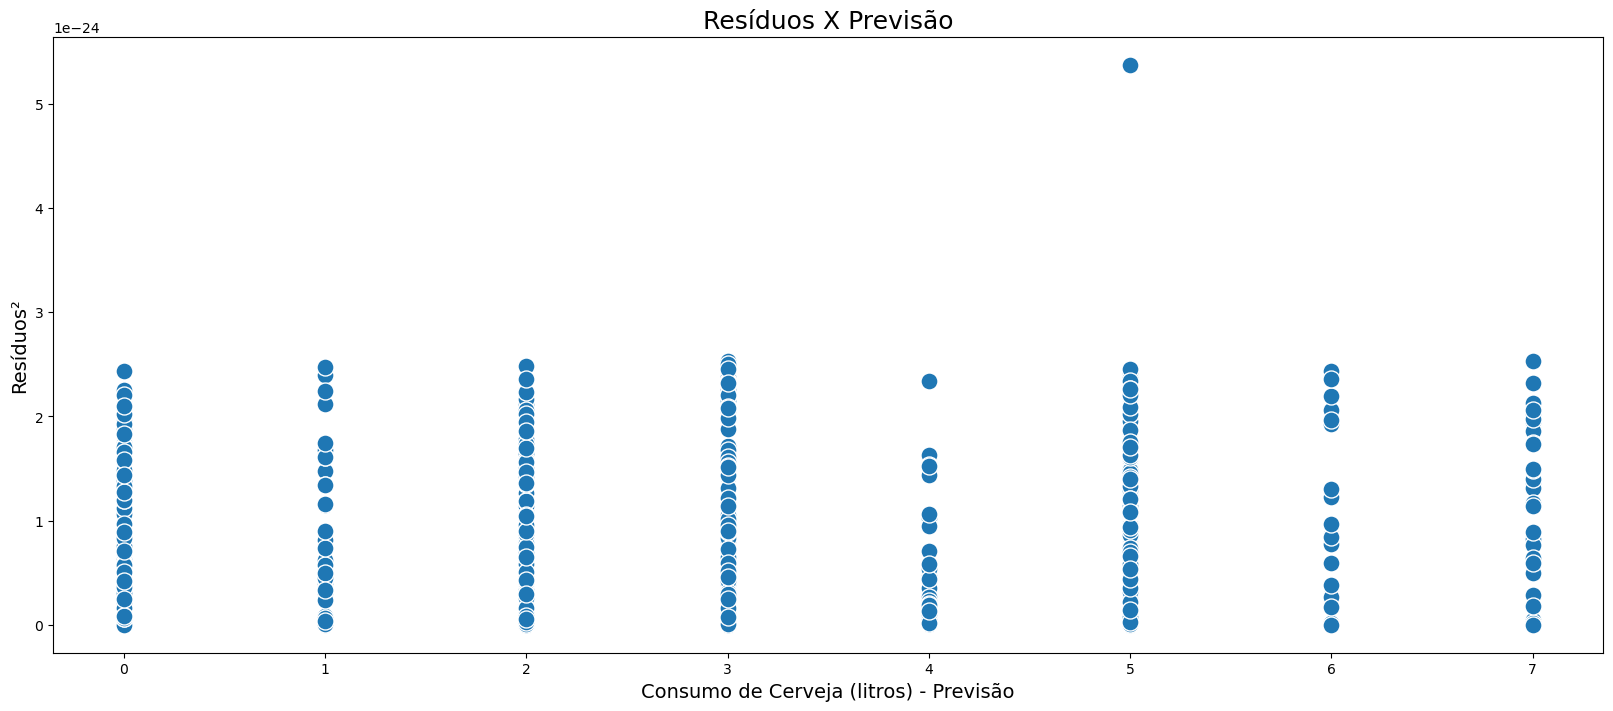

In [106]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

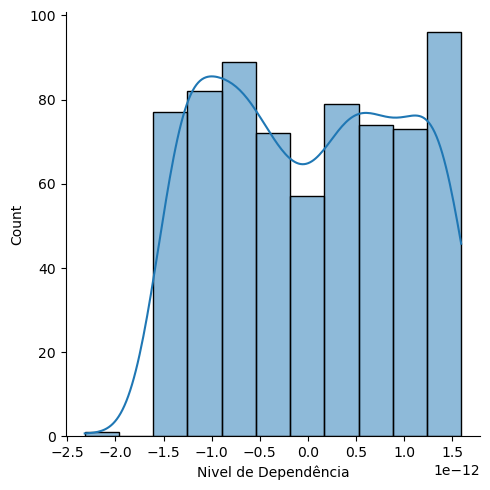

In [110]:
import seaborn as sns

sns.displot(residuo, kde=True)  # kde=True adiciona a curva de densidade
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax